# Notebook E-tivity 3 CE4021 Task 1

**Student name:** Jason Coleman

**Student ID:** 9539719

## Imports

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

 If you believe required imports are missing, please contact your moderator.

# Task 1: Option Dice

Rolling two 6-sided fair dice with the aim of determining the probability that the sum of the two dice is less than 3 or more than 10.

* Briefly explain the type of random variable and probability distribution you will use. The choice of a continuous or a discrete random variable, and the probability distribution (normal, uniform, binomial, ..) should be informed by the type of experiment.

* Write Python code to simulate the experiment. The code should run the experiment a sufficient number of times such that you can experimentally approximate the following:

* The expected value of your random variable.

* The standard deviation of your random variable.

* Plot the distribution found in your simulated experiment with an appropriate number of 'bins'

**N.B.:**

* Structure your notebook as follows:
    1. Markdown cell with problem description
    2. Markdown cells with expected value and standard deviation of your random variable
    3. Cell(s) with experiment
    4. Cell(s) with outputs and graphs
    5. Commentary comparing calculated values to experimentally obtained values.

* You may only use the following modules:
    * Random
    * Numpy
    * A visualisation module such as Matplotlib
    * Math

* You are not required to perform exception handling.
* You are not required to provide tests for your code.

# Solution

## Introduction

**Type of Random Variable:**
The sum of the two dice represents a single  `discrete random` variable as the dice roll can only lead to positive integers in the range 2-12. 

**Probability Distribution:**
You will see that the distribution for the sum of two 6-sided dice, if there are no restrictions, is the normal distribution with an s-curve SDF. However, once we introduce the condition where we will only accept rolls where 2d6 is less that 3 or greater than 10 is less like a normal distribution. Our distribution is a subset of the normal distribution, even for a very large sample size.

Note that I will use $2d6$ to represent the sum of two d6-sided dice.

## Background
When rolling 2d6, each die has 6 possible outcomes: {1, 2, 3, 4, 5, 6}. The sample space for rolling two such dice is the set of all possible ordered pairs of outcomes, one from the first die and one from the second die.

There are a total of $6 \times 6 = 36$ possible ordered pairs in the sample space.

$$
S = \{ (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), \\
    (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), \\
    (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), \\
    (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), \\
    (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), \\
    (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6) \}
$$

#### Probability (when we filter the rolls)
The subset of ordered pairs, that sum to $> 10$ or $< 3$ are:

$$
S' = \{ (1, 1), (5, 6), (6, 5), (6, 6) \}
$$


To find the probability of rolling an ordered pair that belongs to the subset $S'$, we divide the number of desired outcomes by the total number of possible outcomes when rolling two six-sided dice. 

The probability of rolling one of the desired outcomes, $P(S')$ is:

$$
P(S') = \frac{\text{No. of desired outcomes}}{\text{Total Number of Outcomes}}
$$

$$
P(S') = \frac{4}{36} = \frac{1}{9} \approx \boxed{0.11}
$$

 Another way to look at this is:

* Rolling less than 3, rolling a (1,1):
     
    $$\frac{1}{6} \times \frac{1}{6} = \frac{1}{36} = \boxed{0.0278}$$

* Rolling greater than 10: rolling (5,6), (6,5), (6,6)
    
    $$(\frac{1}{6} \times \frac{1}{6}) = \frac{1}{36}$$

    $$(\frac{1}{6} \times \frac{1}{6}) + (\frac{1}{6} \times \frac{1}{6}) = \frac{1}{18}$$

    $$=> \frac{1}{36} + \frac{1}{18} = \frac{1}{12} = \boxed{0.0834}$$

* Probability of rolling a desired outcome is:

    $$
    0.0278 + 0.0834 \approx  \boxed{0.1112}
    $$

### Expected Value
Todo

### Mean
Todo

## Python Implementation

In [2]:
def roll_2d6() -> int:
    """
    Simple function to roll 2d6 and return the sum of the two dice.

    :return: Sum of 2d6 dice roll.
    """
    return random.randint(1,6) + random.randint(1,6)

In [3]:
def experiment_roll2d6(num_trials: int, 
               condition = lambda x: x <= 12) -> list[int]:
    """ 
    Run a simulation of rolling 2d6 num_trials times and return a list of the results.

    :param num_trials: Number of times to run the experiment (effectively controls the sample size).
    :param condition: A function that takes the sum of the 2d6 roll and returns a boolean. 
                      This allows me to filter the results (I can take all rolls or those that meet a condition).

    :return: List of 2d6 rolls from the simulation.
    """

    results = []

    # e.g. Roll the dice n times 
    for i in range(num_trials):
        sum_2d6 = roll_2d6()

        # record the sum if the condition is met
        if condition(sum_2d6):
            results.append(sum_2d6)

    return results

In [4]:
def summarise_experiment(sums: list[int], throws: int) -> None:
    """
    Generic summary function - descriptive stats and plots (PMF and CDF)

    :param sums: list of sums of two 6-sided dice
    :param throws: number of throws of the pairs of dice
    :return: None
    """
 
    sum_counts = {i: sums.count(i) for i in set(sums)}
    print("\nSum\tCount\tProbability")
    for sum_val in sorted(sum_counts.keys()):
        probability = sum_counts[sum_val] / throws
        print(f"{sum_val}\t{sum_counts[sum_val]}\t{probability:.4f}")

    #sum probabilities in sum_counts
    sum_probabilities = sum(sum_counts.values())
    print(f"The probability of rolling a sum that matches the condition is: {sum_probabilities/throws:.4f}")

    # Calculating expected value and standard deviation
    expected_value = np.mean(sums)
    std_dev = np.std(sums)

    print(f"Expected Value (mean) of the sums: {expected_value:.2f}")
    print(f"Standard Deviation of the sums: {std_dev:.2f}")

    # Plotting the Probability Mass Function (PMF)
    plt.hist(sums, bins=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
             align='left', rwidth=0.8, density=True)
    plt.xlabel("Outcome")
    plt.ylabel("Probability")
    plt.title(f"PMF (sum of two 6-sided dice for {format(throws, ',')} throws)")
    plt.xticks(list(range(2, 13)))
    plt.show()

    #plot the Cumulative distribution function (CDF)
    plt.hist(sums, bins=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
             align='left', rwidth=0.8, density=True, cumulative=True)
    plt.xlabel("Outcome")
    plt.ylabel("Probability")
    plt.title(f"CDF (sum of two 6-sided dice for {format(throws, ',')}  throws)")
    plt.xticks(list(range(2, 13)))
    plt.show()

The distribution, if we accepts all throws of the dice, is a nice normal distribution and the CDF is a more ike an s-curve. 

### Experiment 1 - roll 100 throws of 2d6


Sum	Count	Probability
2	1	0.0100
11	7	0.0700
12	2	0.0200
The probability of rolling a sum that matches the condition is: 0.1000
Expected Value (mean) of the sums: 10.30
Standard Deviation of the sums: 2.79


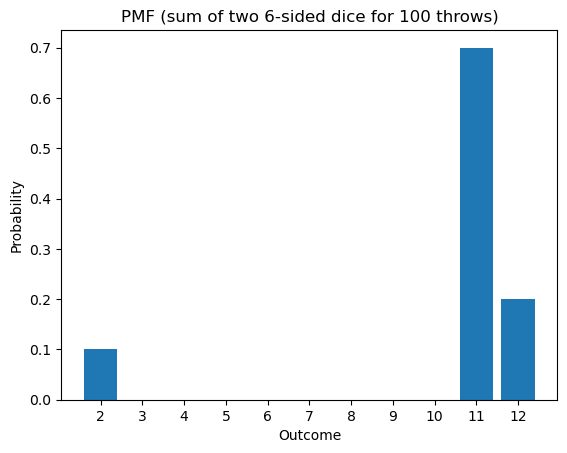

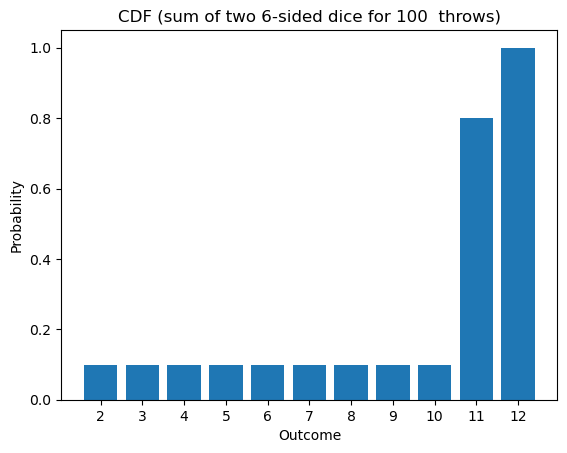

In [5]:
# Only count throws of the dice when the sum is less than 3 or greater than 10
condition_less_than_3_or_greater_than_10 = lambda x: x < 3 or x > 10 

num_trials = 100
sums = experiment_roll2d6(num_trials, condition_less_than_3_or_greater_than_10)
summarise_experiment(sums, num_trials)


Sum	Count	Probability
2	24	0.0240
11	53	0.0530
12	28	0.0280
The probability of rolling a sum that matches the condition is: 0.1050
Expected Value (mean) of the sums: 9.21
Standard Deviation of the sums: 3.95


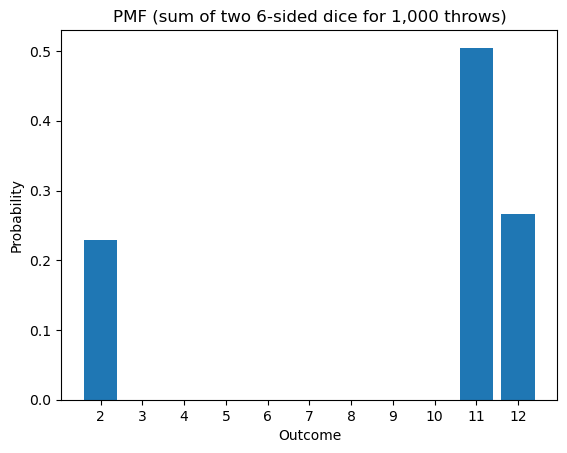

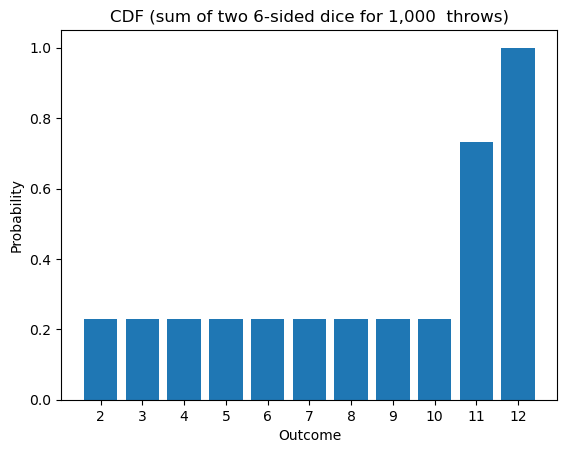

In [6]:
num_trials = 1_000
sums = experiment_roll2d6(num_trials, condition_less_than_3_or_greater_than_10)
summarise_experiment(sums, num_trials)

Note how, for a low sample size increases, the actual approaches (but is not quite at) the expected that was calculated in the background section.

 $$
    \boxed{\approx 0.118}
 $$

### Experiment 2 - roll 10,000,000 of 2d6

We can see that increasing the sample size matches the expected probabilities.


Sum	Count	Probability
2	278479	0.0278
11	554230	0.0554
12	277734	0.0278
The probability of rolling a sum that matches the condition is: 0.1110
Expected Value (mean) of the sums: 8.99
Standard Deviation of the sums: 4.07


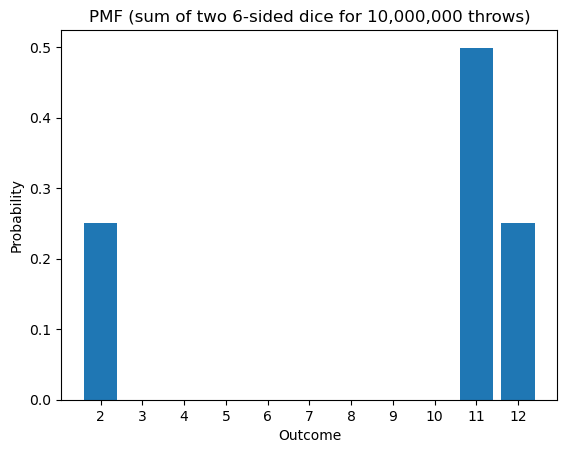

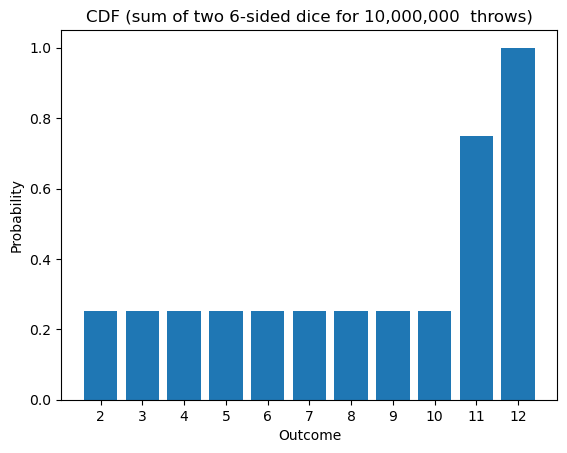

In [7]:
condition_less_than_3_or_greater_than_10 = lambda x: x < 3 or x > 10 

num_trials = 10000000
sums = experiment_roll2d6(num_trials, condition_less_than_3_or_greater_than_10)
summarise_experiment(sums, num_trials)

Note how, as the sample size increases, the actual approaches the expected that was calculated in the background section.

 $$
    \boxed{\approx 0.111}
 $$

## Reflection

Write your reflection in below cell. 

#### Summary:

* The sum of two dice is represented by a discrete random variable.
* The probability distribution is unique to the process of summing two dice, with a  filtering condition and doesn't quite fit the standard definitions of uniform, binomial, or normal distributions.
* The bigger the sample size, the more the actual probabilities tends to approach the expected probabilities.

TODO....

### Experiment 0 
I'd like to examine what happens if I impose zero conditions on the rolls. What happens if we roll 2d6 and accept all sums? Show the PMF and CDF. 


Sum	Count	Probability
4	1	0.1000
5	1	0.1000
6	1	0.1000
7	2	0.2000
8	2	0.2000
9	1	0.1000
10	1	0.1000
12	1	0.1000
The probability of rolling a sum that matches the condition is: 1.0000
Expected Value (mean) of the sums: 7.60
Standard Deviation of the sums: 2.24


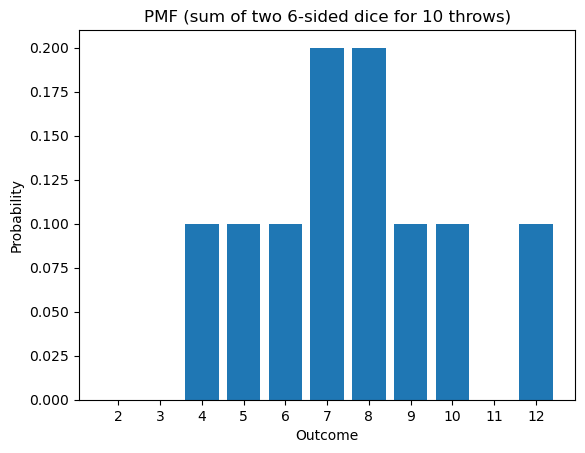

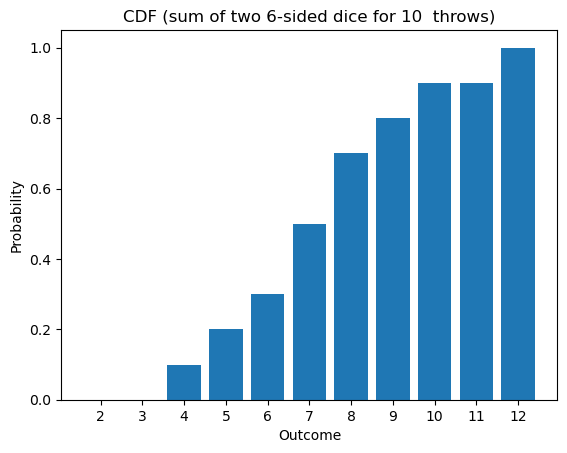

In [8]:
num_trials = 10
sums = experiment_roll2d6(num_trials )
summarise_experiment(sums, num_trials)

Note how the sample size impacts the plots and the descriptive statistics. Increase the number of throws, i.e. use a bigger sample (or throw way more pairs of dice).


Sum	Count	Probability
2	298	0.0298
3	561	0.0561
4	816	0.0816
5	1132	0.1132
6	1338	0.1338
7	1639	0.1639
8	1422	0.1422
9	1114	0.1114
10	863	0.0863
11	527	0.0527
12	290	0.0290
The probability of rolling a sum that matches the condition is: 1.0000
Expected Value (mean) of the sums: 7.00
Standard Deviation of the sums: 2.43


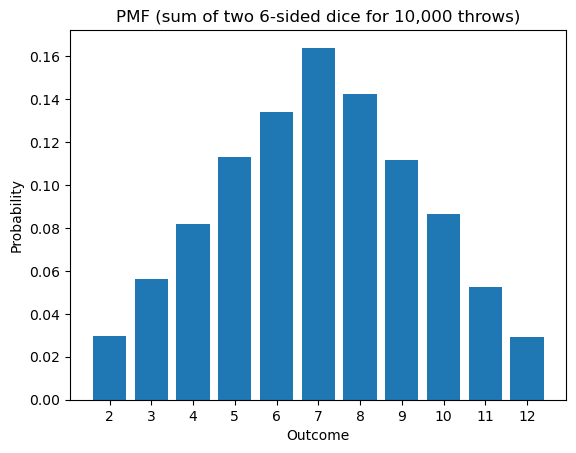

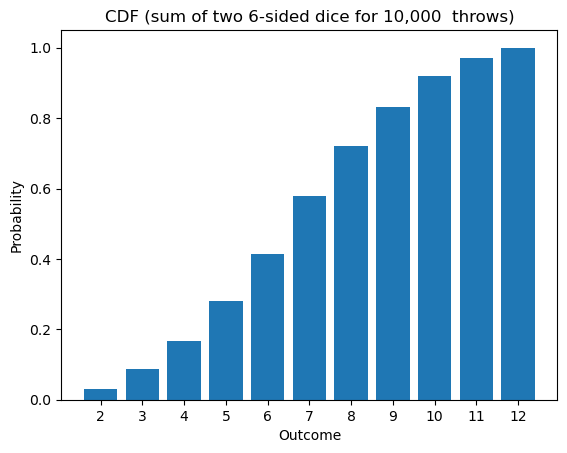

In [9]:
num_trials = 10_000
sums = experiment_roll2d6(num_trials )
summarise_experiment(sums, num_trials)